In [1]:
## Imports

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
## Writing the essential Functions

# Cost Function
def cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    return (1 / (2 * m)) * np.dot(errors.T, errors)

# Gradient Descent
def gd(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradient
        cost_history.append(cost(X, y, theta))

    return theta, cost_history

In [3]:
## Preparing the data set

# Load the dataset
df = pd.read_csv("multi_feature_salary_data.csv")

# Separate features and target
X = df[["YearsExperience", "EducationLevel", "CityTier", "Age"]].values
y = df["Salary"].values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
## Preparing for training

# Add bias term (intercept) to X
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Initialize theta (coefficients)
theta = np.zeros(X_b.shape[1])

In [5]:
# Train the model
alpha = 0.02
iterations = 5000
theta_gd, cost_history = gd(X_b, y, theta, alpha, iterations)

# Print results
print("Learned theta:", theta_gd)
print("Final cost:", cost_history[-1])

Learned theta: [83489.0755     20009.78966874  4893.63532171 -1864.96771424
  1730.37553533]
Final cost: 11176580.526668055


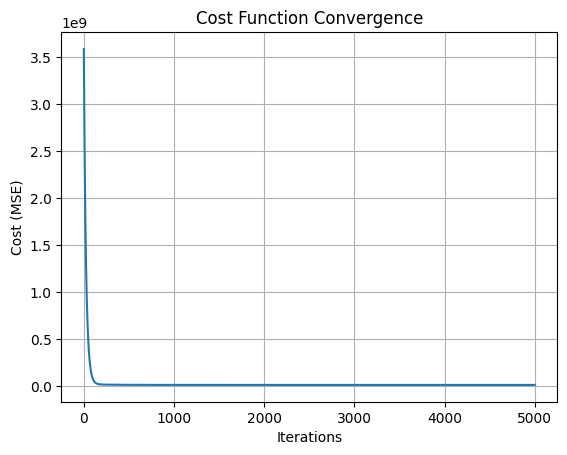

In [6]:
## Cost function convergence graph


plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.grid(True)
plt.show()

In [7]:
# Predicting a new sample
# Example: 5 years exp, UG (2), City Tier 2, Age 30
new_sample = np.array([[2.54,2,1,24.0]])
new_sample_scaled = scaler.transform(new_sample)
new_sample_b = np.c_[np.ones((1, 1)), new_sample_scaled]

y_pred = new_sample_b.dot(theta_gd)
print("Predicted salary for new sample:", round(y_pred[0], 2))

Predicted salary for new sample: 58566.85
